In [53]:
####importing required librarires######
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
###reading the sample data
data=pd.read_csv('/content/employee_sample_data.csv')

In [4]:
###trying to get a basic info of data set####
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [5]:
###as we can see dept and salary are object and rest columns are int/float####
# Print the unique values of the "department" column
print(data.	department.unique())

# Print the unique values of the "salary" column
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


salary is a ordinal variable, a ordinal variable is that can be ranked or has natural order
ex: low,medium,high etc.

department is nominal variable, a variable that cannot be
ranked or has no order example men,women etc

## **Converting categories of ordinal/nominal variables, for ML to understand**



In [6]:

'''
As we know the ML works well with numeric data . In our dataset we have two columns salary and dept in object/category types
ML world we normally have options to convert this into numeric using dummies for nominal variables and other options are available too
for ordinal variables we can order the categories into 0,1,2 etc
'''
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes


In [7]:
#"dummy trap"
'''
Dummy trap: post converting to pd dummies the same information can be conveyed without using an extra column
that is the reason if there are n categories we use n-1 , as the n information is understand by seeing n-1 categories
'''
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department,dtype='int')
# Take a quick look to the first 5 rows of the new DataFrame called departments
display(departments.head())


,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [8]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
###default join is left as per documentation and the join is on index ###
data = data.join(departments)

**High Level Analysis**

In [9]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)
print(n_employees)
# Print the number of employees who left/stayed
print(data.churn.value_counts())
# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

14999
churn
0    11428
1     3571
Name: count, dtype: int64
churn
0    76.191746
1    23.808254
Name: count, dtype: float64


**Co-Relation**

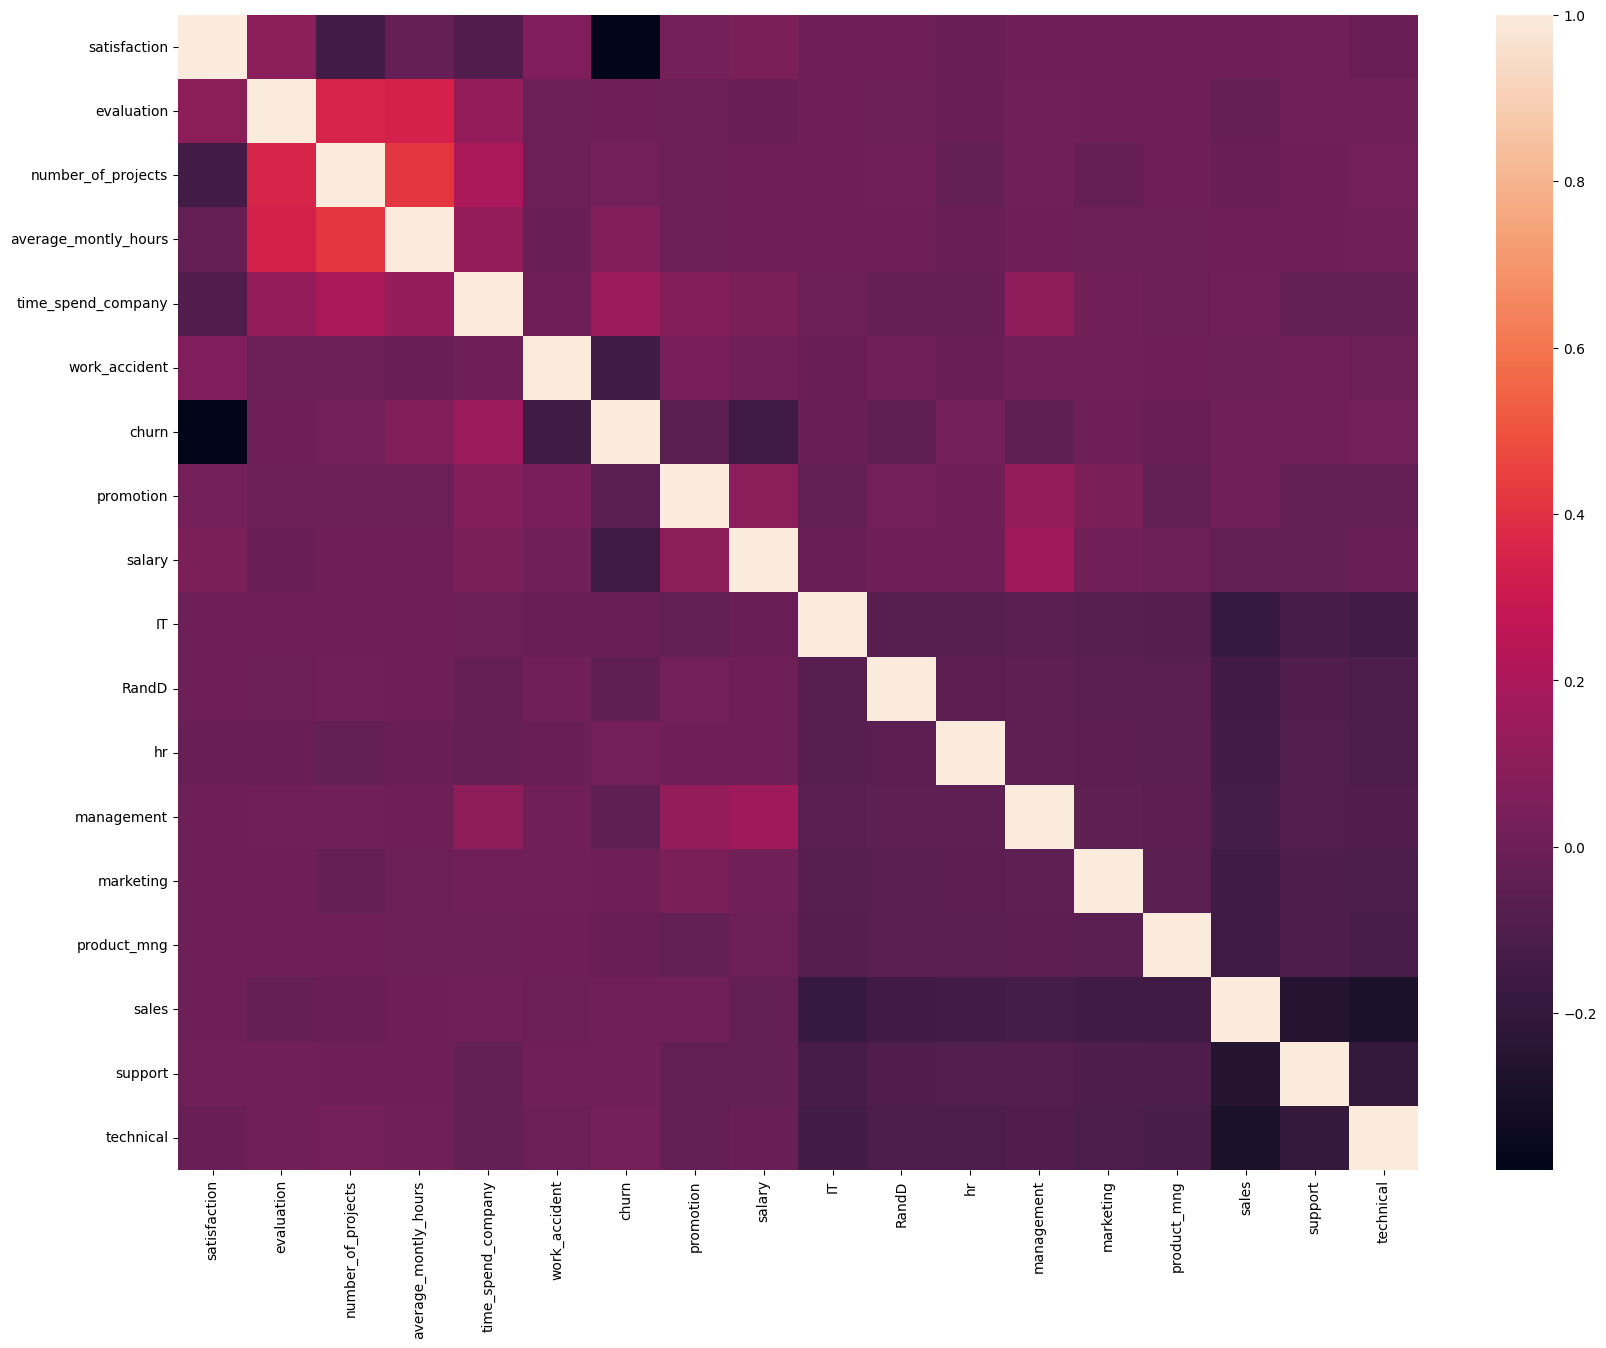

In [11]:
corr_matrix=data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix)
plt.show()

**Set the target and features**

In [12]:
# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

**The ML algorithm we planning to use is Decision Tree**

PROS:
1.   no need of feature scaling (reason we make decision on spliting critieria)

2. Splitting criteria is based on Gini Index or Entropy

Gini:
Formuala : 2*P*(1-p)

In [13]:
'''
lets calculate gini index
we know that people who stayed and left
stayed = 37
left = 1138
'''
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)

**Model Implementation**

In [15]:
# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=42)

**A 100% accuracy usually mean its overfitted**

In [36]:
# Check the accuracy score of the prediction for the training set
print("Training data accuracy",model.score(features_train,target_train)*100)

# Check the accuracy score of the prediction for the test set
print("testing data accuracy ",model.score(features_test,target_test)*100)

Training data accuracy 100.0
testing data accuracy  97.22666666666666


In [38]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

###can use this website to view the dot file
#https://dreampuf.github.io/GraphvizOnline/

**Just to Know which column/feature is used as Root Node**

In [27]:
# Access the tree attributes
tree = model.tree_

# Get the index of the feature used for the root node
root_feature_index = tree.feature[0]

# Get the threshold used for the root node split
root_threshold = tree.threshold[0]

# List of feature names (replace this with your actual feature names if available)
feature_names = features.columns

# Map the feature index to the actual feature name
if root_feature_index != -2:  # -2 indicates a leaf node, but the root node should not be a leaf
    root_feature_name = feature_names[root_feature_index]
    print(f"The root node splits on feature: '{root_feature_name}' with a threshold of {root_threshold}")
else:
    print("The root node is a leaf node (unexpected for a fitted decision tree).")

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion', 'salary', 'IT', 'RandD', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'],
      dtype='object')
The root node splits on feature: 'satisfaction' with a threshold of 0.4650000035762787


**As per the model the accuracy gives an overfitting case
the overfitting can be tackled in many ways ,one way is to reduce the max depth of graph**

In [41]:
max_depth= model.tree_.max_depth
print("the max depth is ",max_depth)
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

the max depth is  22
97.71535247577563
97.06666666666666


**Great , needs to limit no of leaf needed and see result so that there is no over fitting**

In [42]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


**there is balalce between train and test result so model looks good**

Understanding TP,TN,FP,FN
Example : Lets say we want to catch apples falling from a tree, but the tree has organes as well.

True Positive: apples falls , you catch it (your aim was to catch apples)

False Positive: orange falls, you catch it (you caught something but this not what you wanted)

True Negative: Orange falls, you ignore it

False Negative: Apple falls, and you miss to catch it
True Positive (TP): Correctly caught apples.
False Positive (FP): Mistakenly caught oranges.
True Negative (TN): Correctly ignored oranges.
False Negative (FN): Missed apples that you wanted to catch.


Precision tells us, "Out of all the things you said were apples, how many were actually apples?"

Recall tells us, "Out of all the apples that actually fell, how many did you manage to catch?"

In [49]:
# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
print("precision score is ",precision_score(target_test,prediction))


# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
print("the recall score is ",recall_score(target_test, prediction))

precision score is  0.9240641711229947
the recall score is  0.9632107023411371


**AUC measures how well your model can separate the positive class (e.g., apples) from the negative class (e.g., oranges). The higher the AUC, the better the model is at predicting apples when they fall and ignoring oranges.**

In [50]:
# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9691623087590718

**In our data set we could see we have more data of people leaving and less of not leaving this imbalances the data and model**

In [51]:
# Initialize the DecisionTreeClassifier
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


In [52]:
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test,prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


In [57]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [56]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Selecting important Features**

In [60]:
model_best = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_leaf=50)


# Apply a decision tree model to fit features to the target
model_best.fit(features_train,target_train)

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.551529
time_spend_company,0.157009
evaluation,0.144354
number_of_projects,0.092864
average_montly_hours,0.053087
technical,0.000631
hr,0.000295
salary,0.000231
promotion,0.000000
work_accident,0.000000


In [61]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [64]:
###training the best model with selected featuers####
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8,min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)


95.28
91.75027870680044
94.07002193314084
